In [1]:
%matplotlib inline

In [2]:
# !python3 -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

In [3]:
# basic libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math

from IPython import display
import PIL


# detectron2 utilities
import detectron2

from detectron2.utils.logger import setup_logger
setup_logger()
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2 import model_zoo
from k12libs.utils.nb_easy import k12ai_get_top_dir

from detectron2.data.datasets import register_coco_instances

In [4]:
detectron2.__version__

'0.5'

In [5]:
prefix = '/data'

# register dataset
try:
    register_coco_instances("ladder", {}, f"{prefix}/ladder/annotations.json", f"{prefix}/ladder/images/train")
except:
    pass

plates_metadata = MetadataCatalog.get("ladder")
dataset_dicts = DatasetCatalog.get("ladder")

from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import torch, os

cfg = get_cfg()
cfg.merge_from_file(
    model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")
)


cfg.DATASETS.TRAIN = ("ladder",)
cfg.DATASETS.TEST = ()   
cfg.OUTPUT_DIR = '/data/nb_data/cv/det/ladder/'

# initialize model from model zoo
cfg.MODEL.WEIGHTS = "/data/pretrained/cv/model_zoo/model_final_68b088.pkl"  
#cfg.MODEL.WEIGHTS = 'output/model_final.pth' 
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.SOLVER.BASE_LR = 0.00025

cfg.SOLVER.MAX_ITER = 10000    
cfg.SOLVER.CHECKPOINT_PERIOD = 500

cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2 

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[08/09 21:12:55 d2.data.datasets.coco]: Loaded 2000 images in COCO format from /data/ladder/annotations.json
[08/09 21:13:10 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3

[08/09 21:13:10 d2.data.datasets.coco]: Loaded 2000 images in COCO format from /data/ladder/annotations.json
[08/09 21:13:11 d2.data.build]: Removed 0 images with no usable annotations. 2000 images left.
[08/09 21:13:11 d2.data.build]: Distribution of instances among all 2 categories:
|  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|
|   incise   | 1268         |  stiletto  | 1205         |
|            |              |            |              |
|   total    | 2473         |            |              |
[08/09 21:13:11 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]
[08/09 21:13:11 d2.data.build]: Using training sampler TrainingSampler
[08/09 21:13:11 d2.data.common]: Serializing 2000 elements to byte tensors and concatenating them all ...
[08/09 21:13:11 d2.data.common]: Se

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (3, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (3,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (8, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (8,) in the model! You might want to double check if this is expected.
Some model parameters or buffers are not found in the checkpoint:
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, we

[08/09 21:13:12 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.6/dist-packages/detectron2/modeling/roi_heads/fast_rcnn.py:103: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:982.)
  num_fg = fg_inds.nonzero().numel()


[08/09 21:13:36 d2.utils.events]:  eta: 3:05:16  iter: 19  total_loss: 1.36  loss_cls: 1.108  loss_box_reg: 0.2239  loss_rpn_cls: 0.01712  loss_rpn_loc: 0.005197  time: 1.1241  data_time: 0.0631  lr: 4.9953e-06  max_mem: 6058M
[08/09 21:13:59 d2.utils.events]:  eta: 3:06:30  iter: 39  total_loss: 1.267  loss_cls: 1.021  loss_box_reg: 0.2045  loss_rpn_cls: 0.02098  loss_rpn_loc: 0.004325  time: 1.1334  data_time: 0.0264  lr: 9.9902e-06  max_mem: 6058M
[08/09 21:14:22 d2.utils.events]:  eta: 3:06:28  iter: 59  total_loss: 1.077  loss_cls: 0.8612  loss_box_reg: 0.1925  loss_rpn_cls: 0.01782  loss_rpn_loc: 0.005668  time: 1.1366  data_time: 0.0214  lr: 1.4985e-05  max_mem: 6058M
[08/09 21:14:44 d2.utils.events]:  eta: 3:06:03  iter: 79  total_loss: 0.9091  loss_cls: 0.6667  loss_box_reg: 0.2425  loss_rpn_cls: 0.01675  loss_rpn_loc: 0.005457  time: 1.1348  data_time: 0.0293  lr: 1.998e-05  max_mem: 6058M
[08/09 21:15:07 d2.utils.events]:  eta: 3:05:08  iter: 99  total_loss: 0.7514  loss_cls

[08/09 21:26:57 d2.utils.events]:  eta: 2:53:42  iter: 719  total_loss: 0.1913  loss_cls: 0.0401  loss_box_reg: 0.1462  loss_rpn_cls: 1.042e-06  loss_rpn_loc: 0.002838  time: 1.1351  data_time: 0.0224  lr: 0.00017982  max_mem: 6058M
[08/09 21:27:20 d2.utils.events]:  eta: 2:53:23  iter: 739  total_loss: 0.1754  loss_cls: 0.03823  loss_box_reg: 0.1369  loss_rpn_cls: 1.723e-06  loss_rpn_loc: 0.002467  time: 1.1353  data_time: 0.0230  lr: 0.00018482  max_mem: 6058M
[08/09 21:27:42 d2.utils.events]:  eta: 2:52:57  iter: 759  total_loss: 0.1968  loss_cls: 0.03756  loss_box_reg: 0.1533  loss_rpn_cls: 2.295e-06  loss_rpn_loc: 0.002595  time: 1.1347  data_time: 0.0235  lr: 0.00018981  max_mem: 6058M
[08/09 21:28:05 d2.utils.events]:  eta: 2:52:40  iter: 779  total_loss: 0.1792  loss_cls: 0.03914  loss_box_reg: 0.1337  loss_rpn_cls: 8.231e-06  loss_rpn_loc: 0.002983  time: 1.1350  data_time: 0.0217  lr: 0.00019481  max_mem: 6058M
[08/09 21:28:27 d2.utils.events]:  eta: 2:52:20  iter: 799  total

[08/09 21:39:51 d2.utils.events]:  eta: 2:41:34  iter: 1399  total_loss: 0.1121  loss_cls: 0.01866  loss_box_reg: 0.08684  loss_rpn_cls: 9.826e-07  loss_rpn_loc: 0.001592  time: 1.1342  data_time: 0.0234  lr: 0.00025  max_mem: 6058M
[08/09 21:40:13 d2.utils.events]:  eta: 2:41:09  iter: 1419  total_loss: 0.1077  loss_cls: 0.01913  loss_box_reg: 0.08268  loss_rpn_cls: 9.603e-07  loss_rpn_loc: 0.001602  time: 1.1341  data_time: 0.0221  lr: 0.00025  max_mem: 6058M
[08/09 21:40:36 d2.utils.events]:  eta: 2:40:32  iter: 1439  total_loss: 0.1236  loss_cls: 0.02669  loss_box_reg: 0.09681  loss_rpn_cls: 1.774e-06  loss_rpn_loc: 0.002194  time: 1.1339  data_time: 0.0221  lr: 0.00025  max_mem: 6058M
[08/09 21:40:58 d2.utils.events]:  eta: 2:40:15  iter: 1459  total_loss: 0.1317  loss_cls: 0.02409  loss_box_reg: 0.103  loss_rpn_cls: 7.034e-07  loss_rpn_loc: 0.001902  time: 1.1338  data_time: 0.0234  lr: 0.00025  max_mem: 6058M
[08/09 21:41:20 d2.utils.events]:  eta: 2:39:36  iter: 1479  total_los

[08/09 21:52:49 d2.utils.events]:  eta: 2:29:35  iter: 2079  total_loss: 0.1053  loss_cls: 0.02022  loss_box_reg: 0.07744  loss_rpn_cls: 1.124e-06  loss_rpn_loc: 0.001435  time: 1.1351  data_time: 0.0237  lr: 0.00025  max_mem: 6058M
[08/09 21:53:11 d2.utils.events]:  eta: 2:29:01  iter: 2099  total_loss: 0.09294  loss_cls: 0.01735  loss_box_reg: 0.07138  loss_rpn_cls: 3.25e-06  loss_rpn_loc: 0.001568  time: 1.1350  data_time: 0.0229  lr: 0.00025  max_mem: 6058M
[08/09 21:53:34 d2.utils.events]:  eta: 2:28:26  iter: 2119  total_loss: 0.1065  loss_cls: 0.02181  loss_box_reg: 0.08177  loss_rpn_cls: 9.146e-07  loss_rpn_loc: 0.001557  time: 1.1350  data_time: 0.0239  lr: 0.00025  max_mem: 6058M
[08/09 21:53:57 d2.utils.events]:  eta: 2:28:02  iter: 2139  total_loss: 0.1268  loss_cls: 0.02849  loss_box_reg: 0.09321  loss_rpn_cls: 8.895e-07  loss_rpn_loc: 0.001913  time: 1.1350  data_time: 0.0278  lr: 0.00025  max_mem: 6058M
[08/09 21:54:20 d2.utils.events]:  eta: 2:27:47  iter: 2159  total_l

[08/09 22:05:41 d2.utils.events]:  eta: 2:15:40  iter: 2759  total_loss: 0.09304  loss_cls: 0.01804  loss_box_reg: 0.06901  loss_rpn_cls: 1.55e-06  loss_rpn_loc: 0.0008612  time: 1.1338  data_time: 0.0229  lr: 0.00025  max_mem: 6058M
[08/09 22:06:03 d2.utils.events]:  eta: 2:15:21  iter: 2779  total_loss: 0.103  loss_cls: 0.0191  loss_box_reg: 0.08095  loss_rpn_cls: 2.551e-06  loss_rpn_loc: 0.001279  time: 1.1338  data_time: 0.0219  lr: 0.00025  max_mem: 6058M
[08/09 22:06:26 d2.utils.events]:  eta: 2:14:58  iter: 2799  total_loss: 0.115  loss_cls: 0.02276  loss_box_reg: 0.08875  loss_rpn_cls: 1.468e-06  loss_rpn_loc: 0.001528  time: 1.1339  data_time: 0.0292  lr: 0.00025  max_mem: 6058M
[08/09 22:06:49 d2.utils.events]:  eta: 2:14:32  iter: 2819  total_loss: 0.1112  loss_cls: 0.01873  loss_box_reg: 0.08671  loss_rpn_cls: 4.029e-06  loss_rpn_loc: 0.001365  time: 1.1338  data_time: 0.0194  lr: 0.00025  max_mem: 6058M
[08/09 22:07:11 d2.utils.events]:  eta: 2:14:19  iter: 2839  total_los

[08/09 22:18:33 d2.utils.events]:  eta: 2:02:51  iter: 3439  total_loss: 0.08802  loss_cls: 0.01954  loss_box_reg: 0.06644  loss_rpn_cls: 2.153e-06  loss_rpn_loc: 0.001745  time: 1.1333  data_time: 0.0215  lr: 0.00025  max_mem: 6058M
[08/09 22:18:56 d2.utils.events]:  eta: 2:02:26  iter: 3459  total_loss: 0.09549  loss_cls: 0.01462  loss_box_reg: 0.07901  loss_rpn_cls: 7.376e-07  loss_rpn_loc: 0.001422  time: 1.1333  data_time: 0.0272  lr: 0.00025  max_mem: 6058M
[08/09 22:19:19 d2.utils.events]:  eta: 2:02:06  iter: 3479  total_loss: 0.0951  loss_cls: 0.01814  loss_box_reg: 0.07696  loss_rpn_cls: 1.307e-06  loss_rpn_loc: 0.001165  time: 1.1333  data_time: 0.0246  lr: 0.00025  max_mem: 6058M
[08/09 22:19:43 d2.utils.events]:  eta: 2:01:43  iter: 3499  total_loss: 0.1157  loss_cls: 0.0179  loss_box_reg: 0.09179  loss_rpn_cls: 3.169e-06  loss_rpn_loc: 0.001552  time: 1.1333  data_time: 0.0230  lr: 0.00025  max_mem: 6058M
[08/09 22:20:06 d2.utils.events]:  eta: 2:01:19  iter: 3519  total_

[08/09 22:31:28 d2.utils.events]:  eta: 1:50:19  iter: 4119  total_loss: 0.09506  loss_cls: 0.0143  loss_box_reg: 0.07721  loss_rpn_cls: 4.623e-07  loss_rpn_loc: 0.001349  time: 1.1330  data_time: 0.0220  lr: 0.00025  max_mem: 6058M
[08/09 22:31:51 d2.utils.events]:  eta: 1:49:52  iter: 4139  total_loss: 0.09827  loss_cls: 0.01512  loss_box_reg: 0.08126  loss_rpn_cls: 1.06e-06  loss_rpn_loc: 0.001223  time: 1.1330  data_time: 0.0210  lr: 0.00025  max_mem: 6058M
[08/09 22:32:13 d2.utils.events]:  eta: 1:49:24  iter: 4159  total_loss: 0.08843  loss_cls: 0.01621  loss_box_reg: 0.07169  loss_rpn_cls: 8.244e-07  loss_rpn_loc: 0.001397  time: 1.1330  data_time: 0.0263  lr: 0.00025  max_mem: 6058M
[08/09 22:32:36 d2.utils.events]:  eta: 1:48:54  iter: 4179  total_loss: 0.08379  loss_cls: 0.01995  loss_box_reg: 0.05976  loss_rpn_cls: 7.522e-07  loss_rpn_loc: 0.001279  time: 1.1330  data_time: 0.0279  lr: 0.00025  max_mem: 6058M
[08/09 22:32:58 d2.utils.events]:  eta: 1:48:30  iter: 4199  total

[08/09 22:44:23 d2.utils.events]:  eta: 1:37:25  iter: 4799  total_loss: 0.114  loss_cls: 0.01571  loss_box_reg: 0.0939  loss_rpn_cls: 6.577e-07  loss_rpn_loc: 0.001321  time: 1.1333  data_time: 0.0245  lr: 0.00025  max_mem: 6058M
[08/09 22:44:46 d2.utils.events]:  eta: 1:36:59  iter: 4819  total_loss: 0.08415  loss_cls: 0.0169  loss_box_reg: 0.06817  loss_rpn_cls: 7.724e-07  loss_rpn_loc: 0.0006386  time: 1.1333  data_time: 0.0220  lr: 0.00025  max_mem: 6058M
[08/09 22:45:09 d2.utils.events]:  eta: 1:36:44  iter: 4839  total_loss: 0.1086  loss_cls: 0.01561  loss_box_reg: 0.08579  loss_rpn_cls: 8.562e-07  loss_rpn_loc: 0.001222  time: 1.1333  data_time: 0.0215  lr: 0.00025  max_mem: 6058M
[08/09 22:45:32 d2.utils.events]:  eta: 1:36:27  iter: 4859  total_loss: 0.1083  loss_cls: 0.01872  loss_box_reg: 0.0931  loss_rpn_cls: 1.259e-06  loss_rpn_loc: 0.001052  time: 1.1334  data_time: 0.0255  lr: 0.00025  max_mem: 6058M
[08/09 22:45:54 d2.utils.events]:  eta: 1:36:03  iter: 4879  total_los

[08/09 22:57:16 d2.utils.events]:  eta: 1:24:53  iter: 5479  total_loss: 0.08828  loss_cls: 0.01746  loss_box_reg: 0.07121  loss_rpn_cls: 1.528e-06  loss_rpn_loc: 0.0009758  time: 1.1331  data_time: 0.0200  lr: 0.00025  max_mem: 6058M
[08/09 22:57:41 d2.utils.events]:  eta: 1:24:36  iter: 5499  total_loss: 0.07706  loss_cls: 0.01362  loss_box_reg: 0.06143  loss_rpn_cls: 7.64e-07  loss_rpn_loc: 0.001136  time: 1.1332  data_time: 0.0265  lr: 0.00025  max_mem: 6058M
[08/09 22:58:04 d2.utils.events]:  eta: 1:24:13  iter: 5519  total_loss: 0.09174  loss_cls: 0.01217  loss_box_reg: 0.07626  loss_rpn_cls: 1.757e-06  loss_rpn_loc: 0.001345  time: 1.1333  data_time: 0.0194  lr: 0.00025  max_mem: 6058M
[08/09 22:58:27 d2.utils.events]:  eta: 1:23:50  iter: 5539  total_loss: 0.08503  loss_cls: 0.01305  loss_box_reg: 0.06808  loss_rpn_cls: 1.101e-06  loss_rpn_loc: 0.0009167  time: 1.1332  data_time: 0.0210  lr: 0.00025  max_mem: 6058M
[08/09 22:58:49 d2.utils.events]:  eta: 1:23:25  iter: 5559  to

[08/09 23:10:11 d2.utils.events]:  eta: 1:11:49  iter: 6159  total_loss: 0.06377  loss_cls: 0.01296  loss_box_reg: 0.05199  loss_rpn_cls: 1.475e-06  loss_rpn_loc: 0.0008232  time: 1.1330  data_time: 0.0235  lr: 0.00025  max_mem: 6058M
[08/09 23:10:33 d2.utils.events]:  eta: 1:11:28  iter: 6179  total_loss: 0.07621  loss_cls: 0.01714  loss_box_reg: 0.0612  loss_rpn_cls: 1.39e-06  loss_rpn_loc: 0.001064  time: 1.1329  data_time: 0.0249  lr: 0.00025  max_mem: 6058M
[08/09 23:10:56 d2.utils.events]:  eta: 1:11:07  iter: 6199  total_loss: 0.08134  loss_cls: 0.01187  loss_box_reg: 0.06647  loss_rpn_cls: 1.319e-06  loss_rpn_loc: 0.001129  time: 1.1329  data_time: 0.0235  lr: 0.00025  max_mem: 6058M
[08/09 23:11:19 d2.utils.events]:  eta: 1:10:47  iter: 6219  total_loss: 0.07691  loss_cls: 0.01904  loss_box_reg: 0.05582  loss_rpn_cls: 1.536e-06  loss_rpn_loc: 0.0007788  time: 1.1329  data_time: 0.0252  lr: 0.00025  max_mem: 6058M
[08/09 23:11:41 d2.utils.events]:  eta: 1:10:22  iter: 6239  tot

[08/09 23:23:02 d2.utils.events]:  eta: 0:59:07  iter: 6839  total_loss: 0.08978  loss_cls: 0.01364  loss_box_reg: 0.07389  loss_rpn_cls: 2.99e-06  loss_rpn_loc: 0.001433  time: 1.1325  data_time: 0.0226  lr: 0.00025  max_mem: 6058M
[08/09 23:23:24 d2.utils.events]:  eta: 0:58:44  iter: 6859  total_loss: 0.07828  loss_cls: 0.01206  loss_box_reg: 0.06351  loss_rpn_cls: 3.506e-06  loss_rpn_loc: 0.001194  time: 1.1325  data_time: 0.0264  lr: 0.00025  max_mem: 6058M
[08/09 23:23:47 d2.utils.events]:  eta: 0:58:21  iter: 6879  total_loss: 0.0804  loss_cls: 0.01606  loss_box_reg: 0.06037  loss_rpn_cls: 1.713e-06  loss_rpn_loc: 0.001058  time: 1.1325  data_time: 0.0301  lr: 0.00025  max_mem: 6058M
[08/09 23:24:10 d2.utils.events]:  eta: 0:58:00  iter: 6899  total_loss: 0.09024  loss_cls: 0.01392  loss_box_reg: 0.07713  loss_rpn_cls: 1.066e-06  loss_rpn_loc: 0.001198  time: 1.1325  data_time: 0.0271  lr: 0.00025  max_mem: 6058M
[08/09 23:24:32 d2.utils.events]:  eta: 0:57:37  iter: 6919  total

[08/09 23:35:58 d2.utils.events]:  eta: 0:46:24  iter: 7519  total_loss: 0.08828  loss_cls: 0.01429  loss_box_reg: 0.06699  loss_rpn_cls: 8.982e-07  loss_rpn_loc: 0.001227  time: 1.1326  data_time: 0.0304  lr: 0.00025  max_mem: 6058M
[08/09 23:36:20 d2.utils.events]:  eta: 0:46:00  iter: 7539  total_loss: 0.086  loss_cls: 0.01431  loss_box_reg: 0.06675  loss_rpn_cls: 1.287e-06  loss_rpn_loc: 0.001041  time: 1.1326  data_time: 0.0242  lr: 0.00025  max_mem: 6058M
[08/09 23:36:43 d2.utils.events]:  eta: 0:45:39  iter: 7559  total_loss: 0.07137  loss_cls: 0.0136  loss_box_reg: 0.06025  loss_rpn_cls: 1.112e-06  loss_rpn_loc: 0.00127  time: 1.1326  data_time: 0.0215  lr: 0.00025  max_mem: 6058M
[08/09 23:37:06 d2.utils.events]:  eta: 0:45:16  iter: 7579  total_loss: 0.07574  loss_cls: 0.01368  loss_box_reg: 0.05968  loss_rpn_cls: 2.276e-06  loss_rpn_loc: 0.001034  time: 1.1326  data_time: 0.0248  lr: 0.00025  max_mem: 6058M
[08/09 23:37:28 d2.utils.events]:  eta: 0:44:54  iter: 7599  total_l

[08/09 23:48:50 d2.utils.events]:  eta: 0:33:42  iter: 8199  total_loss: 0.09887  loss_cls: 0.01537  loss_box_reg: 0.08505  loss_rpn_cls: 2.482e-06  loss_rpn_loc: 0.001238  time: 1.1324  data_time: 0.0245  lr: 0.00025  max_mem: 6058M
[08/09 23:49:12 d2.utils.events]:  eta: 0:33:19  iter: 8219  total_loss: 0.07638  loss_cls: 0.01218  loss_box_reg: 0.06033  loss_rpn_cls: 5.888e-07  loss_rpn_loc: 0.001154  time: 1.1323  data_time: 0.0200  lr: 0.00025  max_mem: 6058M
[08/09 23:49:35 d2.utils.events]:  eta: 0:32:57  iter: 8239  total_loss: 0.07546  loss_cls: 0.00883  loss_box_reg: 0.06513  loss_rpn_cls: 4.11e-06  loss_rpn_loc: 0.0009921  time: 1.1323  data_time: 0.0221  lr: 0.00025  max_mem: 6058M
[08/09 23:49:57 d2.utils.events]:  eta: 0:32:33  iter: 8259  total_loss: 0.08136  loss_cls: 0.01411  loss_box_reg: 0.06629  loss_rpn_cls: 1.338e-06  loss_rpn_loc: 0.001198  time: 1.1323  data_time: 0.0223  lr: 0.00025  max_mem: 6058M
[08/09 23:50:20 d2.utils.events]:  eta: 0:32:11  iter: 8279  tot

[08/10 00:01:44 d2.utils.events]:  eta: 0:21:01  iter: 8879  total_loss: 0.06967  loss_cls: 0.01173  loss_box_reg: 0.05696  loss_rpn_cls: 3.255e-06  loss_rpn_loc: 0.001126  time: 1.1325  data_time: 0.0261  lr: 0.00025  max_mem: 6058M
[08/10 00:02:07 d2.utils.events]:  eta: 0:20:38  iter: 8899  total_loss: 0.08043  loss_cls: 0.01121  loss_box_reg: 0.06593  loss_rpn_cls: 1.902e-06  loss_rpn_loc: 0.001149  time: 1.1325  data_time: 0.0224  lr: 0.00025  max_mem: 6058M
[08/10 00:02:30 d2.utils.events]:  eta: 0:20:16  iter: 8919  total_loss: 0.07102  loss_cls: 0.01149  loss_box_reg: 0.05925  loss_rpn_cls: 1.948e-06  loss_rpn_loc: 0.001347  time: 1.1325  data_time: 0.0272  lr: 0.00025  max_mem: 6058M
[08/10 00:02:53 d2.utils.events]:  eta: 0:19:54  iter: 8939  total_loss: 0.0739  loss_cls: 0.008193  loss_box_reg: 0.06543  loss_rpn_cls: 9.536e-07  loss_rpn_loc: 0.0008258  time: 1.1326  data_time: 0.0231  lr: 0.00025  max_mem: 6058M
[08/10 00:03:16 d2.utils.events]:  eta: 0:19:32  iter: 8959  to

[08/10 00:14:40 d2.utils.events]:  eta: 0:08:15  iter: 9559  total_loss: 0.0877  loss_cls: 0.01348  loss_box_reg: 0.07278  loss_rpn_cls: 1.896e-06  loss_rpn_loc: 0.0009207  time: 1.1326  data_time: 0.0212  lr: 0.00025  max_mem: 6058M
[08/10 00:15:03 d2.utils.events]:  eta: 0:07:53  iter: 9579  total_loss: 0.06892  loss_cls: 0.01134  loss_box_reg: 0.05813  loss_rpn_cls: 1.4e-06  loss_rpn_loc: 0.0006703  time: 1.1326  data_time: 0.0227  lr: 0.00025  max_mem: 6058M
[08/10 00:15:25 d2.utils.events]:  eta: 0:07:30  iter: 9599  total_loss: 0.0885  loss_cls: 0.01517  loss_box_reg: 0.06568  loss_rpn_cls: 1.864e-06  loss_rpn_loc: 0.001158  time: 1.1325  data_time: 0.0222  lr: 0.00025  max_mem: 6058M
[08/10 00:15:48 d2.utils.events]:  eta: 0:07:07  iter: 9619  total_loss: 0.07093  loss_cls: 0.01055  loss_box_reg: 0.05743  loss_rpn_cls: 2.3e-06  loss_rpn_loc: 0.0008374  time: 1.1325  data_time: 0.0194  lr: 0.00025  max_mem: 6058M
[08/10 00:16:10 d2.utils.events]:  eta: 0:06:45  iter: 9639  total_

In [6]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.8
cfg.MODEL.RETINANET.SCORE_THRESH_TEST = 0.4

predictor = DefaultPredictor(cfg)

In [10]:
def cv2_imshow(np_img, scale=1.0):
    np_img = np_img.clip(0, 255).astype('uint8')
    if np_img.ndim == 3:
        if np_img.shape[2] == 4:
            np_img = cv2.cvtColor(np_img, cv2.COLOR_BGRA2RGBA)
        else:
            np_img = cv2.cvtColor(np_img, cv2.COLOR_BGR2RGB)
    pil_img = PIL.Image.fromarray(np_img)
    if scale != 1.0:
        pil_img = pil_img.resize((math.ceil(scale*pil_img.width), math.ceil(scale*pil_img.height)))
    display.display(pil_img)

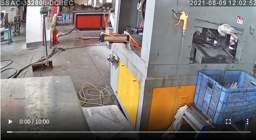

((350, 638, 3), None)

In [17]:
img = cv2.imread(prefix + '/ladder/test/test_3.png')

img.shape, cv2_imshow(img, scale=0.4)

In [18]:
outputs = predictor(img)
print(outputs, len(outputs['instances']))
print(type(outputs['instances'].pred_boxes))

{'instances': Instances(num_instances=8, image_height=350, image_width=638, fields=[pred_boxes: Boxes(tensor([[467.8794,  70.3922, 621.9306, 160.3147],
        [446.2343, 175.9903, 638.0000, 318.6552],
        [474.2100, 106.5426, 593.7424, 158.2345],
        [  5.2467, 188.7281, 246.8795, 323.9147],
        [181.6124,  23.2819, 276.0045,  69.9172],
        [244.9953,   8.3558, 637.1094, 320.7794],
        [200.2410, 262.3865, 325.7280, 325.6428],
        [589.9273,  38.6935, 606.2928,  61.6004]], device='cuda:0')), scores: tensor([0.9852, 0.9571, 0.9276, 0.9107, 0.8781, 0.8472, 0.8245, 0.8143],
       device='cuda:0'), pred_classes: tensor([0, 0, 0, 0, 0, 0, 0, 1], device='cuda:0')])} 8
<class 'detectron2.structures.boxes.Boxes'>


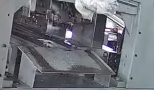

In [20]:
boxes = outputs['instances'].pred_boxes.tensor.to('cpu').numpy()[0]
x0, y0, x1, y1 = [math.ceil(z) for z in boxes]
crop_img = img[y0:y1, x0:x1]
cv2_imshow(crop_img)

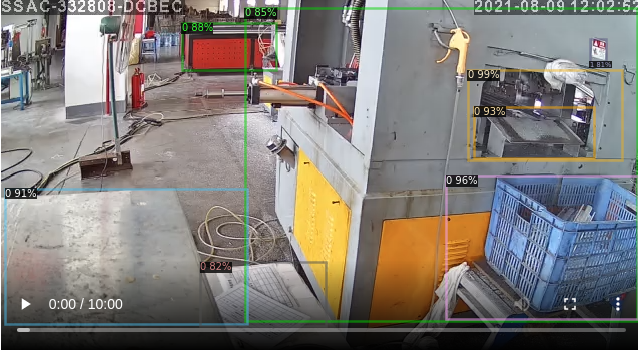

In [21]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_0001999.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.8
cfg.MODEL.RETINANET.SCORE_THRESH_TEST = 0.4

predictor = DefaultPredictor(cfg)
v = Visualizer(
    img[:, :, ::-1],
    scale=1., 
    instance_mode=ColorMode.IMAGE
)
v = v.draw_instance_predictions(outputs['instances'].to('cpu'))

result = v.get_image()
PIL.Image.fromarray(result)